In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [102]:
filepath = r'D:\infosys_spring\anomaly-detection-project\dataset\anomaly_data.csv'
df = pd.read_csv(filepath)
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


In [104]:
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [105]:
df.isna().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

In [106]:
df['Acc'] = df['Acc'].fillna(df['Acc'].mean()) 

In [107]:
df.isnull().sum()

timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
dtype: int64

In [108]:
percentile25 = df['Density'].quantile(0.25)
percentile75 = df['Density'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  3.36
25th quartile:  1.34


In [109]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  2.0199999999999996


In [110]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 6.389999999999999
Lower limit -1.6899999999999993


In [111]:
# def find_outliers_IQR(df):

#    q1=df.quantile(0.25)

#    q3=df.quantile(0.75)

#    IQR=q3-q1

#    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#    return outliers
# outliers = find_outliers_IQR(df['Speed'])

# print("number of outliers: "+ str(len(outliers)))

# print("max outlier value: "+ str(outliers.max()))

# print("min outlier value: "+ str(outliers.min()))
# outliers

In [112]:
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [113]:
print(df.columns)


Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')


In [114]:
X = df.drop(columns=['timestamp', 'X', 'Y', 'AgentCount',
                     'Acc','LevelOfCrowdness', 'label', 'label2', 'Severity_level'])
y = df['label'] 


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

X.head(1)                                                   

,Speed,Heading,Density
0,1.1432,89.1222,0.81


In [115]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors =3,p=2)

In [117]:
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# y_pred

In [118]:
# from sklearn import metrics
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [119]:
from sklearn import metrics
# We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[5059    6]
 [   8 2164]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5065
           1       1.00      1.00      1.00      2172

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237



In [120]:
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate the accuracy on the training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9986971455643728
Test Accuracy: 0.9980654967527981


In [121]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

Cross-Validation Scores: [0.9973357  0.99792715 0.99822328 0.99733491 0.99703879]
Mean Cross-Validation Score: 0.9975719670890376


In [122]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data
y_pred = classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[5059    6]
 [   8 2164]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5065
           1       1.00      1.00      1.00      2172

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237



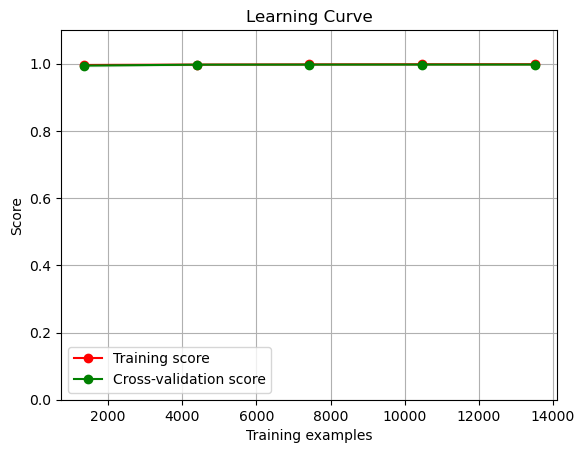

In [123]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim((0.0, 1.1))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Example usage:
plot_learning_curve(classifier, X_train, y_train)
plt.show()


In [124]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

Cross-Validation Scores: [0.9973357  0.99792715 0.99822328 0.99733491 0.99703879]
Mean Cross-Validation Score: 0.9975719670890376


Text(0, 0.5, 'Accuracy')

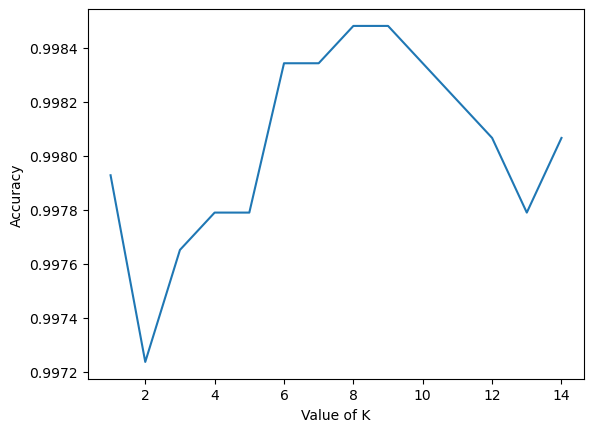

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")